

# Lightning Studio Setup Guide

* What is Lightning Studio?

* [Why Use Lightning Studio?](https://lightning.ai/docs/overview/studios/)

* Installing packages with a simple example

# Local Setup Guide

Follow these steps to set up your environment locally on macOS.

### 1. **Install Visual Studio Code (VSCode)**
   - Download and install Visual Studio Code from the official [VSCode Website](https://code.visualstudio.com/).
   - **VSCode** is a powerful, lightweight code editor, ideal for Python development and working with notebooks and scripts.

### 2. **Install Git**
  Homebrew is the package manager for installation.
   If you don’t have Git installed yet, follow these steps:
   - **If you don't have Homebrew** installed, run the following command to install it:
     ```bash
     /bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"
     ```
  
  Git is a version control system.
   - **Install Git using Homebrew**:
     ```bash
     brew install git
     ```
  
### 3. **Install Required Python Packages**
   Ensure you have the necessary Python packages installed. Follow the steps below:

   - **Check if `pip3` is installed**:
     ```bash
     pip3 --version
     ```
   - If `pip3` is not installed, upgrade it using:
     ```bash
     python -m ensurepip --upgrade
     ```

   - **Install `uv` package** (to manage virtual environments):
     ```bash
     pip3 install uv
     ```
   - **In case you get an error like "uv not found"**:
     - Check the installation path of `uv` using:
       ```bash
       pip3 show uv
       ```
     - If the path isn’t in your `$PATH`, you need to add it to your `.bashrc`, `.zshrc`, or equivalent shell configuration file. Example:
       ```bash
       export PATH=$PATH:/Users/divyam/Library/Python/3.9/bin
       source .zshrc
       ```

### 4. **Create UV Virtual Environment**
   Use the following `uv` commands to set up and manage your Python virtual environment:

   - **Initialize the environment**:
     ```bash
     uv init
     ```
   - **Add `ipykernel` as a development dependency**:
     ```bash
     uv add --dev ipykernel
     ```
   - **Add dependencies from a `requirements.txt` file**:
     ```bash
     uv add -r requirements.txt
     ```

### 5. **Install Numpyro (Exercise)**


To test your installation, run the following cells using the environment.
- Find "Select Kernel" in the upper right corner of ipynb within vs code. 
- Select "Python Environments..."
- Select .venv (```.venv/bin/python```)
- Click "Run All" on the top.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
import numpyro

/Users/lavender/Desktop/DS-GA-1003-Machine-Learning-2025/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def generate_logic_gate_data(num_samples=100):
    inputs = np.random.uniform(-1, 1, size=(num_samples, 2))

    outputs_or = np.logical_or(inputs[:, 0] > 0, inputs[:, 1] > 0).astype(int).reshape(-1, 1)   
    outputs_xor = np.logical_xor(inputs[:, 0] > 0, inputs[:, 1] > 0).astype(int).reshape(-1, 1) 

    inputs_tensor = torch.tensor(inputs, dtype=torch.float32)
    outputs_or_tensor = torch.tensor(outputs_or, dtype=torch.float32)
    outputs_xor_tensor = torch.tensor(outputs_xor, dtype=torch.float32)

    return {
        "inputs": inputs_tensor,
        "outputs_or": outputs_or_tensor,
        "outputs_xor": outputs_xor_tensor
    }

In [4]:
def visualize_logic_gate_data(data):
    inputs = data["inputs"].numpy()
    outputs_or = data["outputs_or"].numpy()
    outputs_xor = data["outputs_xor"].numpy()

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].scatter(inputs[:, 0], inputs[:, 1], c=outputs_or.flatten(), cmap='coolwarm', label='OR')
    axs[0].set_title('OR Gate')
    axs[0].set_xlabel('Input 1')
    axs[0].set_ylabel('Input 2')

    axs[1].scatter(inputs[:, 0], inputs[:, 1], c=outputs_xor.flatten(), cmap='coolwarm', label='XOR')
    axs[1].set_title('XOR Gate')
    axs[1].set_xlabel('Input 1')
    axs[1].set_ylabel('Input 2')

    plt.tight_layout()
    plt.show()

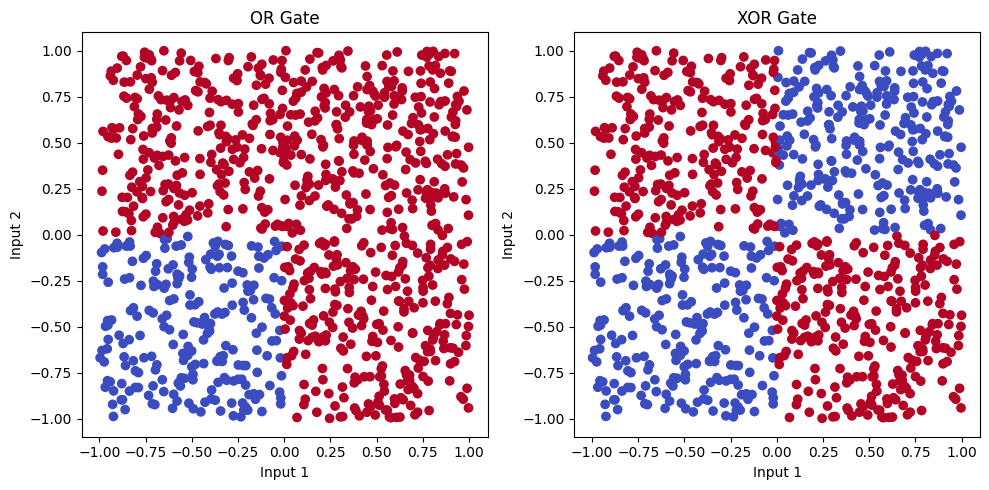

In [5]:
data = generate_logic_gate_data(num_samples=1000)
visualize_logic_gate_data(data)